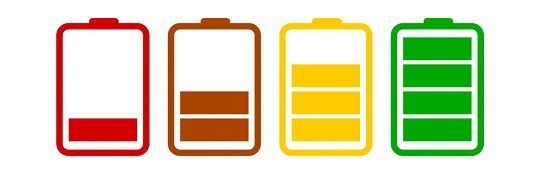

image from https://sac0800fone.com/aplicacoes-que-facilitam-a-sua-vida-e-ajuda-na-bateria/

# Introduction

Remaining useful life (RUL) is the amount of time a machine or an asset is likely to operate before it requires repair or replacement. Depending on your system, this time period can be represented in number of Days, Miles, Cycles or any other quantity. RUL prediction provides early warnings of failure and has become a key component in the prognostics and health management of systems. It allows engineers to schedule maintenance, optimize operating efficiency and avoid unplanned downtime.

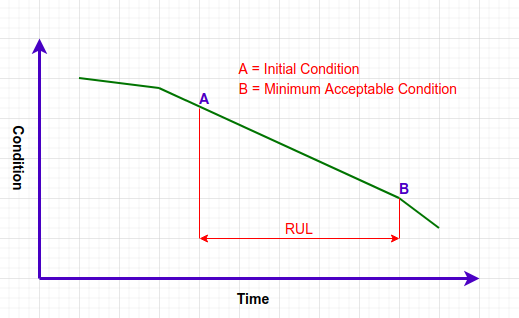

This image shows the deterioration of a machine over time. If A is the current condition and B is the minimum acceptable condition beyond which the machine will fail, Remaining Useful Life is computed as the time between these two points. If RUL is estimated in advance, maintenance or replacement can be carried out to avoid unplanned downtime and economic losses. Since the prediction of RUL is critical to operations and decision making, it is important to estimate it accurately.

reference: 'Remaining Useful Life (RUL) Prediction'( https://www.stratada.com/remaining-useful-life-rul-prediction/ )

# Importing and data outline

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Battery_RUL.csv.zip')

In [4]:
df.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [6]:
df.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


In [7]:
numlist=df.columns

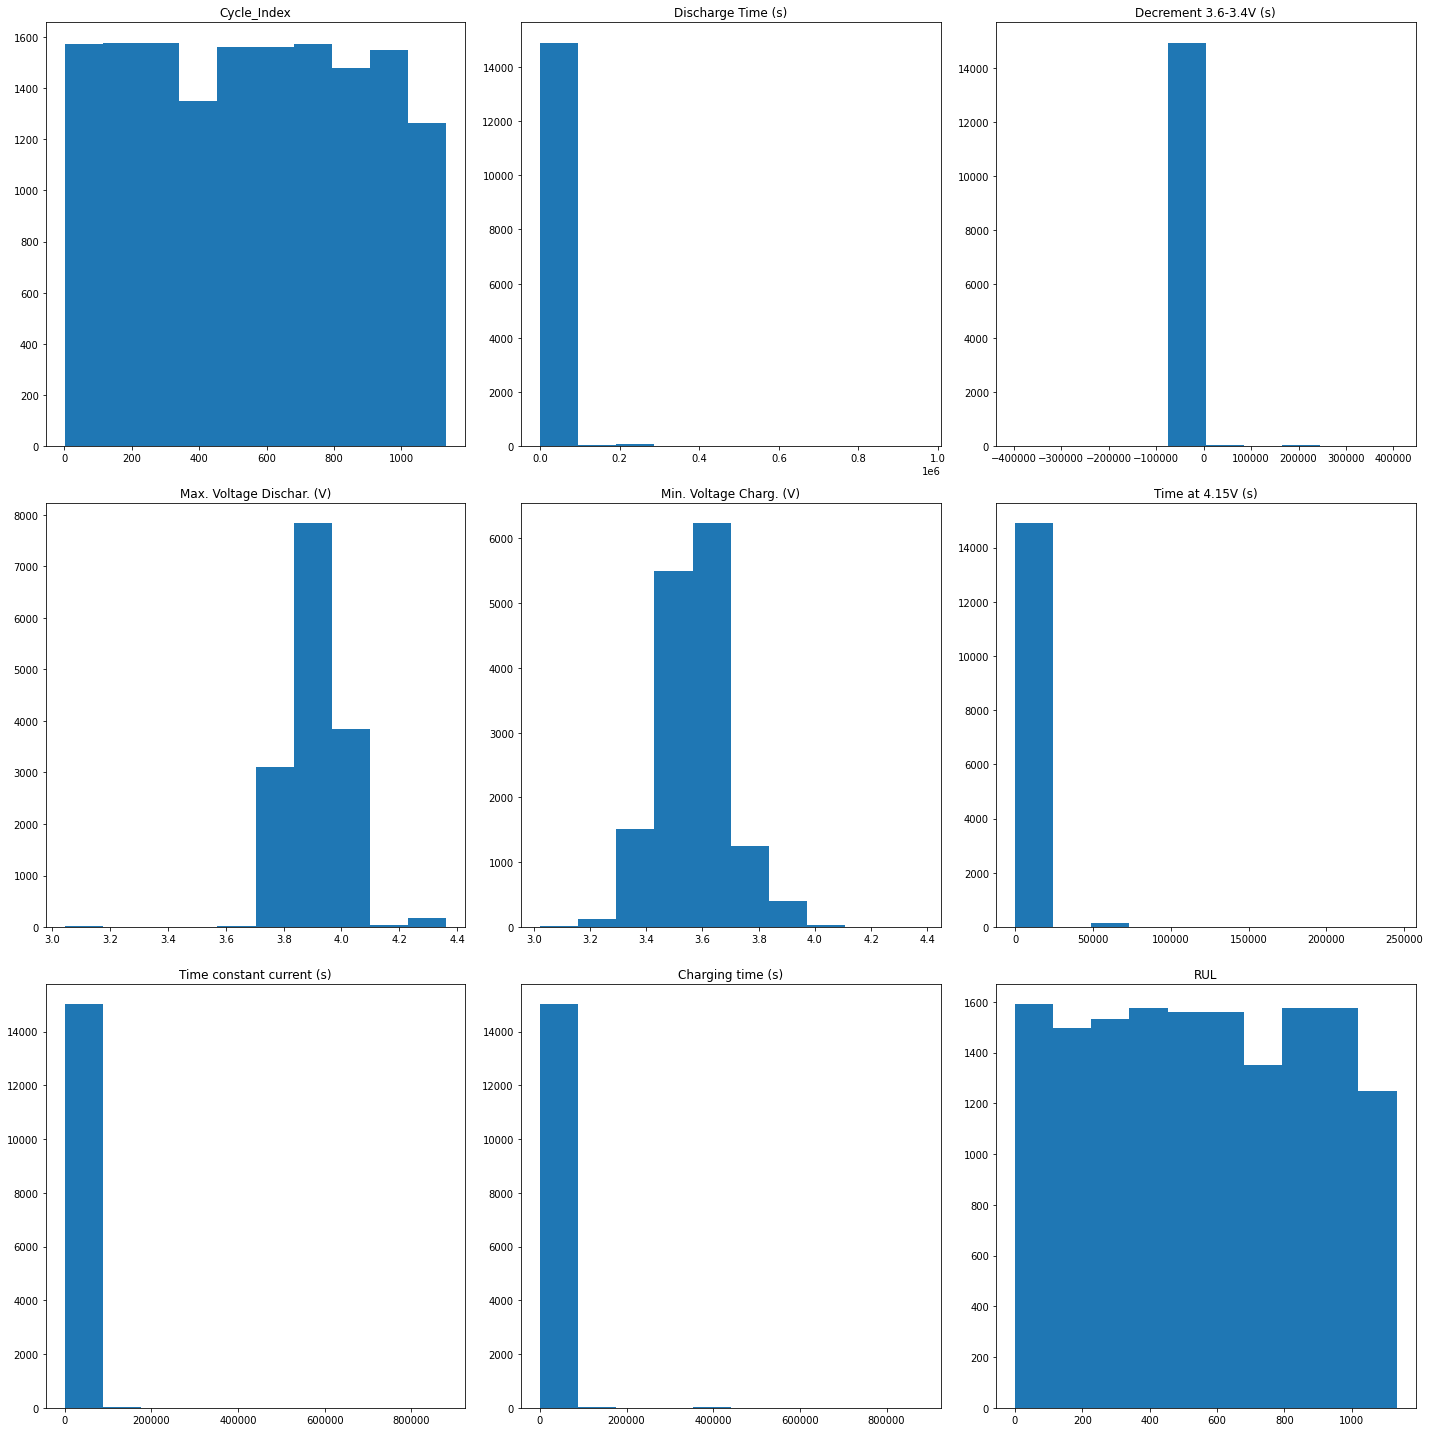

In [8]:
fig = plt.figure(figsize=(20,20))
for i in range(len(numlist)):
    plt.subplot(3,3,i+1)
    plt.title(numlist[i],fontsize=12)
    plt.hist(df[numlist[i]])

plt.tight_layout()

# Correlation among features

<AxesSubplot:>

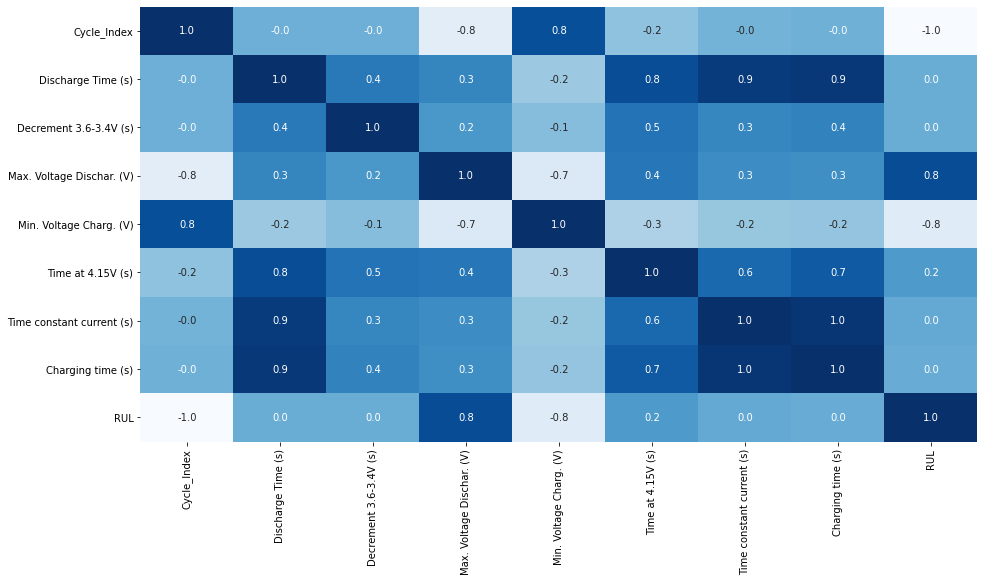

In [9]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f')

Correlation between RUL and
* Max. Voltage Dischar. (V) is 0.8
* Min. Voltage Charg. (V) is -0.8
* Time at 4.15V (s) is 0.2
* Cycle index is -1.0
* Discharge Time (s), Decrement 3.6-3.4V (s), Time constant current (s) and Charging time (s)　are 0. And correlation between Time at 4.15V and these four features are 0.8, 0.5,0.6 and 0.7.

So I drop Discharge Time (s), Decrement 3.6-3.4V (s), Time constant current (s) and Charging time (s). And I drop 'Cycle_Index' from features because it may cause leakage.

In [10]:
df1=df.drop(['Cycle_Index','Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Time constant current (s)','Charging time (s)'],axis=1)

# Prediction Model

In [11]:
from pycaret import regression

In [12]:
exp_reg = regression.setup(df1, target='RUL', session_id=2, use_gpu=True)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,Description,Value
0,Session id,2
1,Target,RUL
2,Target type,Regression
3,Original data shape,"(15064, 4)"
4,Transformed data shape,"(15064, 4)"
5,Transformed train set shape,"(10544, 4)"
6,Transformed test set shape,"(4520, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

In [13]:
best_model = regression.compare_models(budget_time=10, turbo=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,14.1024,783.7510,27.9489,0.9924,0.2559,0.1893,0.4100
rf,Random Forest Regressor,15.9599,980.7199,31.1654,0.9906,0.2537,0.1949,0.4920
dt,Decision Tree Regressor,16.9146,1598.8025,39.8993,0.9846,0.3110,0.1958,0.0330
lightgbm,Light Gradient Boosting Machine,28.0496,1711.4906,41.3084,0.9835,0.3349,0.2925,0.1710
gbr,Gradient Boosting Regressor,35.6546,2325.8752,48.1898,0.9776,0.3852,0.3603,0.5480
knn,K Neighbors Regressor,41.9817,4098.4959,63.8738,0.9605,0.4207,0.3796,0.0320
ada,AdaBoost Regressor,63.8973,5682.9296,75.3660,0.9452,0.5391,0.7917,0.2630
ridge,Ridge Regression,108.0140,27410.0541,165.0495,0.7363,0.6845,0.9649,0.0130
lar,Least Angle Regression,107.0532,27425.8891,165.0692,0.7361,0.6804,0.9521,0.0110
lr,Linear Regression,107.0626,27448.6710,165.1322,0.7359,0.6795,0.9520,0.0140


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

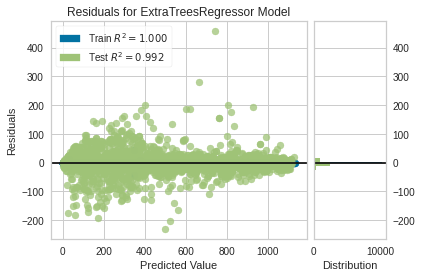

In [14]:
regression.plot_model(best_model, plot='residuals')

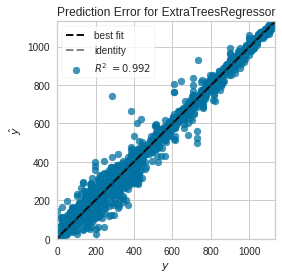

In [15]:
regression.plot_model(best_model, plot='error')

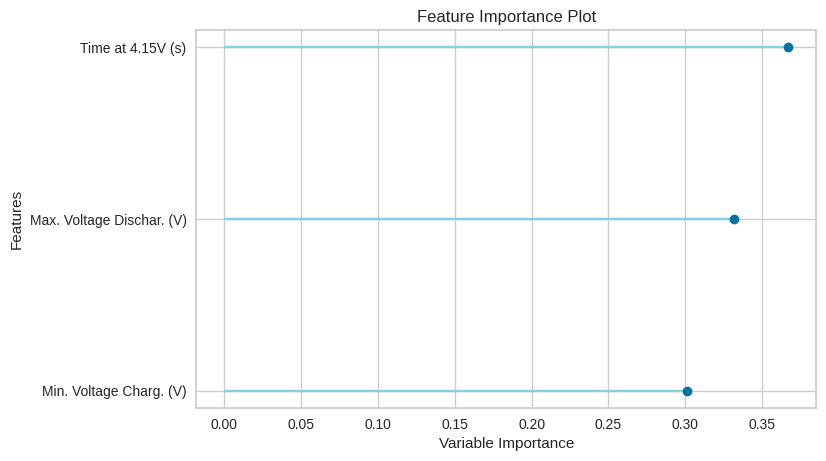

In [16]:
regression.plot_model(best_model, plot='feature')

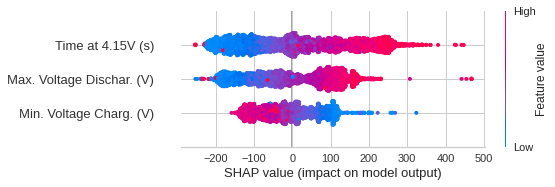

In [17]:
# interpret the best model
regression.interpret_model(best_model, plot='summary')

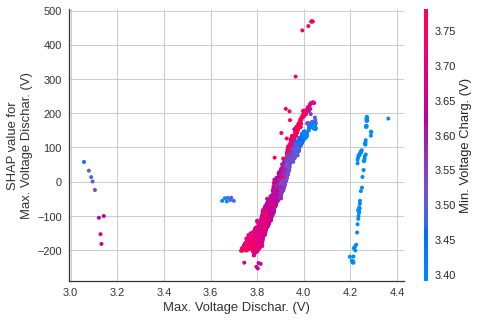

In [18]:
regression.interpret_model(best_model, plot='correlation')

In [19]:
regression.interpret_model(best_model, plot='reason', observation=1)